# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que uma empresa fictícia investe: TV, Jornal e Rádio

#### Importar a Base de dados

In [1]:
import pandas as pd

df = pd.read_csv("dataset/Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

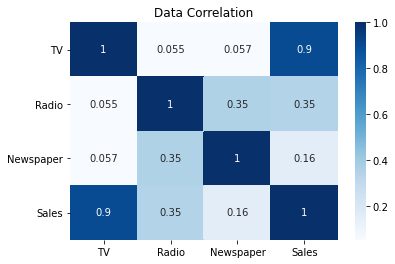

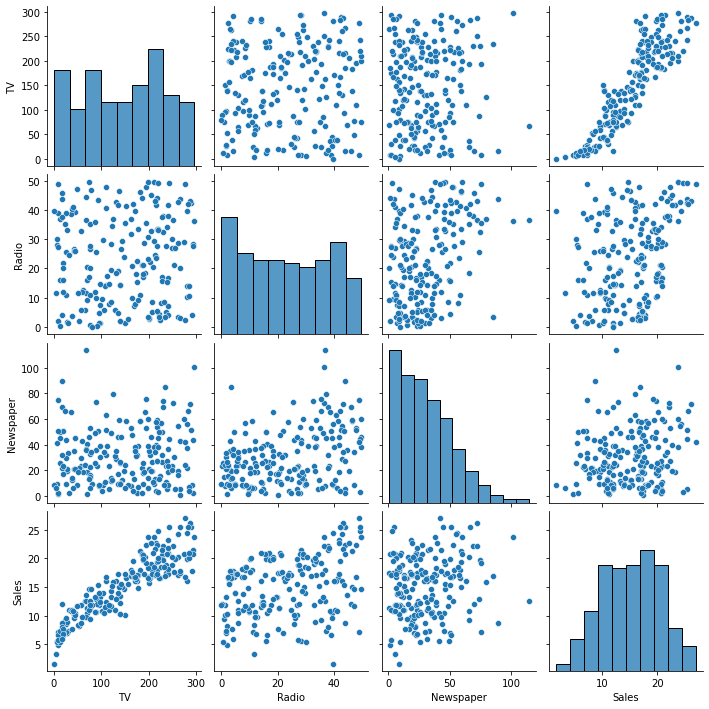

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(), cmap = "Blues", annot = True)
plt.title("Data Correlation")
plt.show()
sns.pairplot(df)

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop("Sales", axis = 1)

y = df["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

#### Escolhendo o Modelo

- RandomForest (Árvore de Decisão)

In [5]:
from sklearn.ensemble import RandomForestRegressor

modelo_random_forest = RandomForestRegressor()

modelo_random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [6]:
previsao_rf = modelo_random_forest.predict(x_test)

#### Teste da AI



In [10]:
from sklearn import metrics

print("Accuracy score of {}: {:.2f}%".format(modelo_random_forest, metrics.r2_score(y_test, previsao_rf)*100))

Accuracy score of RandomForestRegressor() 96.75%


#### Visualização Gráfica da Previsão

<AxesSubplot:>

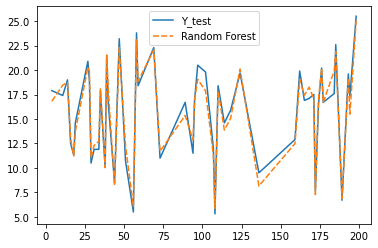

In [8]:
aux = pd.DataFrame()
aux["Y_test"] = y_test
aux["Random Forest"] = previsao_rf

sns.lineplot(data=aux)


#### Qual a importância de cada variável para as vendas?

<AxesSubplot:>

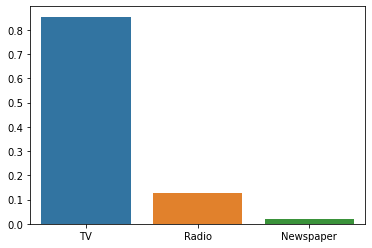

In [9]:
sns.barplot(x = x_test.columns, y = modelo_random_forest.feature_importances_)